In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [ ]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
import random
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
import pickle
from keras.layers.convolutional import Conv2D, MaxPooling2D
np.random.seed(0)

Using TensorFlow backend.


In [ ]:
with open("german-traffic-signs/train.p",'rb') as f:
  train_data=pickle.load(f)
with open("german-traffic-signs/valid.p",'rb') as f:
  val_data=pickle.load(f)
with open("german-traffic-signs/test.p",'rb') as f:
  test_data=pickle.load(f)

In [ ]:
X_train,y_train=train_data['features'],train_data['labels']
X_val,y_val=val_data['features'],val_data['labels']
X_test,y_test=test_data['features'],test_data['labels']

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (32,32,3)), "The dimensions of the images are not 32X32"
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of the images are not 32X32"
assert(X_val.shape[1:]==(32,32,3)),"The dimensions of the images are not 32X32"

In [ ]:
import pandas as pd
dataset=pd.read_csv("german-traffic-signs/signnames.csv")

In [ ]:
dataset

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


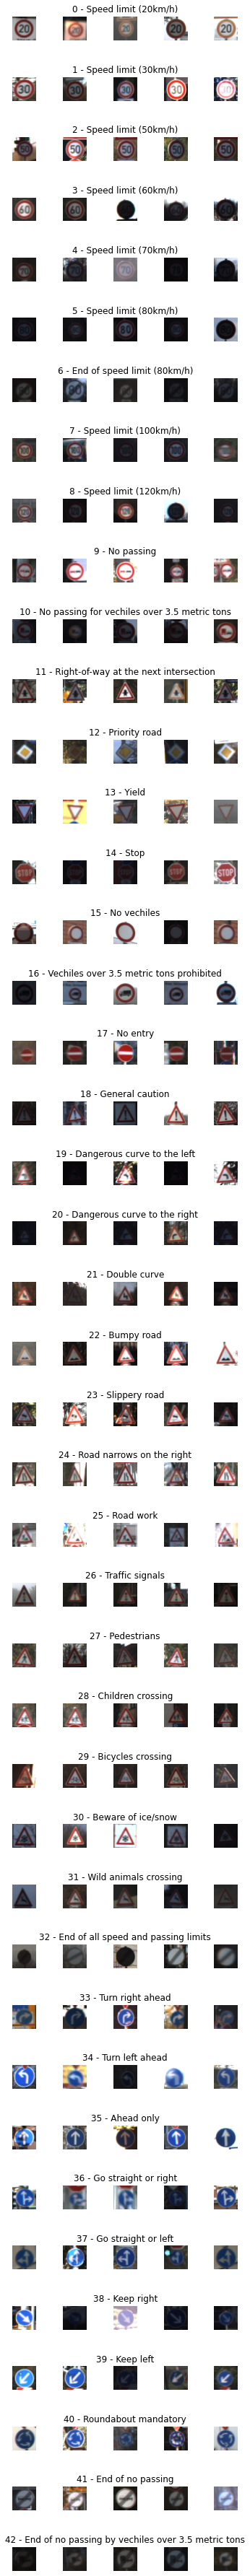

In [ ]:
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j, row in dataset.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


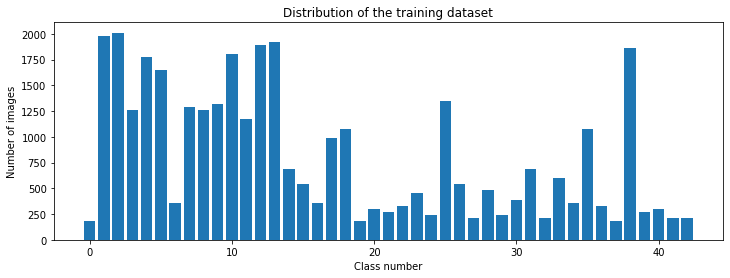

In [ ]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
print(num_of_samples)

(-0.5, 31.5, 31.5, -0.5)

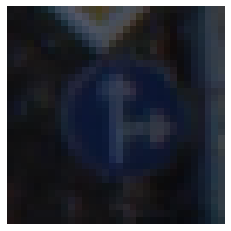

In [ ]:
import cv2
plt.imshow(X_train[1000])
plt.axis('off')

In [ ]:
print(X_train[1000].shape)

(32, 32, 3)


In [ ]:
print(y_train[1000])

36


(32, 32)


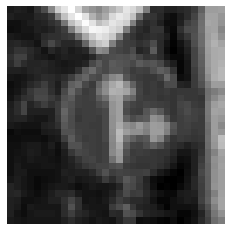

In [ ]:
def grayscale1(img):
  img1=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  return img1
img=grayscale1(X_train[1000])
plt.imshow(img,cmap=plt.get_cmap("gray"))
plt.axis("off")
print(img.shape)

(32, 32)


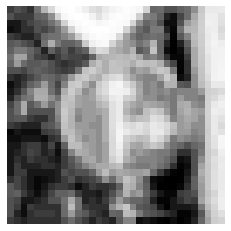

In [ ]:
def equalise(img):
  img=cv2.equalizeHist(img)
  return img
img=equalise(img)
plt.imshow(img,cmap=plt.get_cmap("gray"))
plt.axis("off")
print(img.shape)

In [ ]:
def pre_processing(img):
  img=grayscale1(img)
  img=equalise(img)
  img=img/255
  return img
X_train=np.array(list(map(pre_processing,X_train)))
X_test=np.array(list(map(pre_processing,X_test)))
X_val=np.array(list(map(pre_processing,X_val)))



(34799, 32, 32)


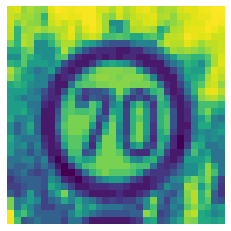

In [ ]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis("off")
print(X_train.shape)

In [ ]:
X_train=X_train.reshape(len(X_train),32,32,1)
X_test=X_test.reshape(len(X_test),32,32,1)
X_val=X_val.reshape(len(X_val),32,32,1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)
 
datagen.fit(X_train)
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)

(15, 32, 32, 1)


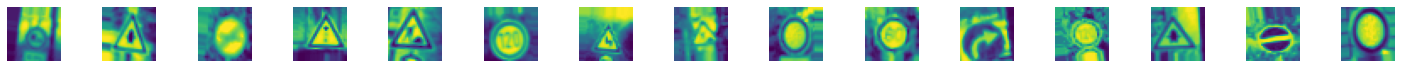

In [ ]:
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")
 
print(X_batch.shape)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [ ]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)
y_val=to_categorical(y_val,43)

In [ ]:
def model():
  model=Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32,32,1),activation='relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43,activation='softmax'))
  model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [ ]:
model=model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 30)         

In [ ]:
his=model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                            steps_per_epoch=2000,
                            epochs=10,
                            validation_data=(X_val, y_val), shuffle = 1)

Epoch 1/10
2000/2000 [==============================] - 45s 22ms/step - loss: 0.1203 - accuracy: 0.9642 - val_loss: 0.0269 - val_accuracy: 0.9916
Epoch 2/10
2000/2000 [==============================] - 44s 22ms/step - loss: 0.1224 - accuracy: 0.9636 - val_loss: 0.0190 - val_accuracy: 0.9943
Epoch 3/10
2000/2000 [==============================] - 45s 22ms/step - loss: 0.1131 - accuracy: 0.9658 - val_loss: 0.0497 - val_accuracy: 0.9866
Epoch 4/10
2000/2000 [==============================] - 44s 22ms/step - loss: 0.1073 - accuracy: 0.9681 - val_loss: 0.0729 - val_accuracy: 0.9900
Epoch 5/10
2000/2000 [==============================] - 43s 22ms/step - loss: 0.1061 - accuracy: 0.9684 - val_loss: 0.0289 - val_accuracy: 0.9918
Epoch 6/10
2000/2000 [==============================] - 43s 22ms/step - loss: 0.1062 - accuracy: 0.9696 - val_loss: 0.0186 - val_accuracy: 0.9943
Epoch 7/10
2000/2000 [==============================] - 43s 22ms/step - loss: 0.1054 - accuracy: 0.9695 - val_loss: 0.0315 -

Text(0.5, 0, 'epoch')

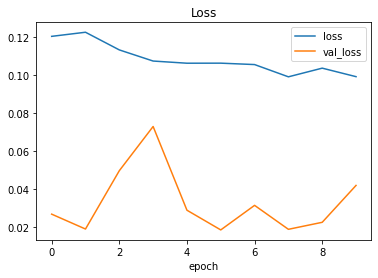

In [ ]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
score=model.evaluate(X_test,y_test,verbose=0)
print(score[1])

0.9715756177902222


Text(0.5, 0, 'epoch')

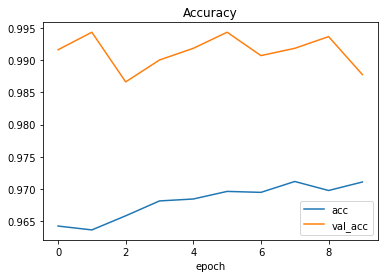

In [ ]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

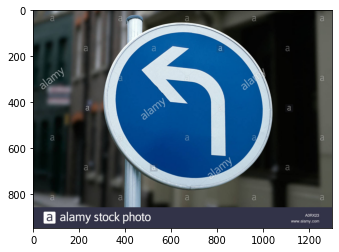

In [ ]:
import requests
from PIL import Image
import cv2
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap("gray"))
 
 

 


(32, 32)


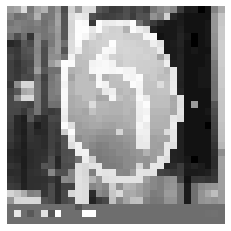

In [ ]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = pre_processing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.axis("off")
print(img.shape)

In [ ]:
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [38]
